![Astrofisica Computacional](../logo.PNG)

---
## 01. Spectral Methods. 1D  Advection Equation 

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this notebook we use some spectral methods to solve the 1-dimensional  advection equation.


---
## The Linear Advection Equation and the Spectral Methods

Consider the 1-dimensional linear advection equation with constant velocity, $v$,

\begin{equation}
\partial_t \psi + v \partial_x \psi = 0.
\end{equation}

An interesting method to numerically solve this euqations is based on the spectral decomposition of the unknown function $\psi(t,x)$. In general, we may write an expansion in terms of some basis functions $\phi(x)$,

\begin{equation}
\psi(t,x) = \sum_{k} a_k(t) \phi_k(x),
\end{equation}

where the coeffcients $a_k(t)$  are dependent on time while the spatial dependence is given in the periodic functions $\phi_k (x)$. In order to solve the advection equation, we will use an expansion in harmonic functions,

\begin{equation}
\psi(t,x) = \sum_{k} a_k(t) e^{\frac{2\pi i k x}{L}}
\end{equation}

where $L$ is the integration domain size. It is clear that, in these expansions, the index takes values in the range $k \in (-\infty, \infty)$. Computationally, we  need to truncate this series, for example to values in the range $-\left(\frac{N}{2}-1\right) \leq k \leq \frac{N}{2}$ for a total of $N$  terms,

\begin{equation}
\psi(t,x) = \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) e^{\frac{2\pi i k x}{L}}.
\end{equation}



Now, we discretize the spatial domain by defining $n$ nodes, i.e. $N = n-1$ sub-intervals with size $\Delta x = \frac{L}{N}$. We denote $\psi_j (t) = \psi(t,x_j)$ and therefore we write

\begin{equation}
\psi_j(t) = \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) e^{\frac{2\pi i k x_j}{L}}.
\end{equation}

Since the intervals are equal, we can write

\begin{equation}
x_j = \frac{j}{N}L
\end{equation}

and then,

\begin{equation}
\psi_j(t) = \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) e^{\frac{2\pi i k j}{N}} \,\, \text{  for } j=0,1,2,...,N .
\end{equation}

This equation corresponds to the *inverse Discrete Fourier Transform (iDFT)* defined in a previous lesson (in fact, the values $a_k (t)$ correspond to the coeffcients $\gamma_k$ defined in that lesson). 

Hence, it is possible to invert this relation to obtain the DFT


\begin{equation}
a_k (t) = \frac{1}{N}\sum_{j=0}^{N-1} \psi_j (t) \exp\left( - \frac{2\pi i kj}{N} \right)   \,\, \text{  for  } k = -\frac{N}{2} +1, -\frac{N}{2} +2, ..., \frac{N}{2} .
\end{equation}


---
## Solving the Linear Advection Equation using the Spectral Decomposition

From the results above, the time derivative of the unknown function $\psi(t,x)$ will be

\begin{equation}
\frac{\partial \psi (t,x)}{\partial t} = \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} \frac{d a_k(t)}{dt} e^{\frac{2\pi i k x}{L}},
\end{equation}

while its spatial derivative will be

\begin{equation}
\frac{\partial \psi (t,x)}{\partial x} = \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \frac{2\pi i k}{L}  e^{\frac{2\pi i k x}{L}}.
\end{equation}

Replacing the above expressions into the advection equation gives

\begin{equation}
\sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} \left[ \frac{d a_k(t)}{dt} + v   \frac{2\pi i k}{L} a_k(t) \right] e^{\frac{2\pi i k x}{L}} = 0,
\end{equation}

which simplifyies due to the orthonormality of the functions $e^{\frac{2\pi i k x}{L}}$ in the interval of size $L$. Then, we have an ordinary differential equation for the coefficients,

\begin{equation}
 \frac{d a_k(t)}{dt} +    \frac{2\pi i k}{L}v a_k(t) = 0
\end{equation}

which can be integrated directly to obtain

\begin{equation}
a_k(t) =  a_k(0) \exp{\left(-\frac{2\pi i k}{L}vt \right)}.
\end{equation}

Hence, from the spectral decomposition, we obtain the complete solution as

\begin{equation}
\psi(t,x) = \sum_{k} a_k(0) \exp{\left(-\frac{2\pi i k}{L}vt \right)} \exp{\left( \frac{2\pi i k x}{L}\right)}
\end{equation}

where the coefficients $a_k (0)$ are obtained from the DFT of the initial condition,

\begin{equation}
a_k (0) = \frac{1}{N}\sum_{j=0}^{N-1} \psi_j (0) \exp\left( - \frac{2\pi i kj}{N} \right) = F_k \left[ \psi (0) \right].
\end{equation}


Spatial discretization of the solution function gives

\begin{equation}
\psi_j(t) = \sum_{k} F_k \left[ \psi (0) \right] \exp{\left(\frac{-2\pi i k}{L}vt \right)} \exp{\left(\frac{2\pi i k}{L}x_j \right)}
\end{equation}

\begin{equation}
\psi_j(t) = \sum_{k} \left( F_k \left[ \psi (0) \right] \exp{\left(\frac{-2\pi i k}{L}vt \right)}\right)  \exp{\left(\frac{2\pi i kj}{N} \right)}
\end{equation}

This result shows that it can be written as an iDFT

\begin{equation}
\psi_j(t) = F_j^{-1}\left[ F_k \left[ \psi (0) \right] \exp{\left(\frac{-2\pi i k}{L}vt \right)} \right].
\end{equation}

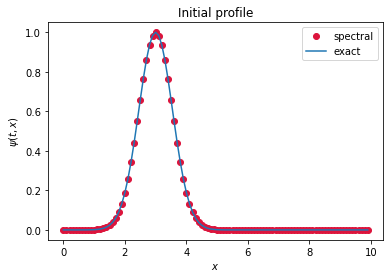

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft

# definition of the initial Gaussian profile
def gaussian(x):
    x0 = 3. 
    sigma = np.sqrt(0.3)
    return np.exp(-(x-x0)**2/(2*sigma**2))

# solution by the spectral method
def psi_sol(u0, t):
    N = len(u0)
    k = np.arange(N)
    k[int(N/2)+1:]-= N
    return ifft(np.exp(-2*np.pi*1j*k*v*t/L)*fft(u0)).real


# spatial grid definition

xi = 0.
xf = 10.
L   = xf - xi

nx  = 100 # number of spatial nodes
dx = L/nx     # not L/(nx-1)
x = np.arange(0., L, dx) 

v   = 0.7

psi0 = gaussian(x)

fig,ax=plt.subplots()
ax.plot(x, psi_sol(psi0,0), 'o', color='crimson', label='spectral')
ax.plot(x, psi0, label='exact')
plt.title('Initial profile')
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(t,x)$')
plt.legend()
plt.show()

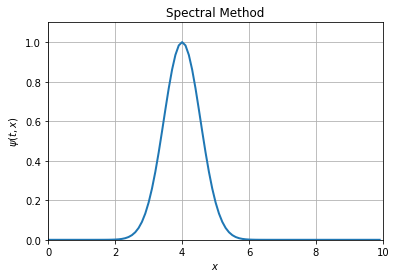

In [2]:
from matplotlib import animation
from IPython.display import HTML

t = np.linspace(0,30,100)


# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.title('Spectral Method')
ax.set_xlim(( 0, 10))
ax.set_ylim((0, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\psi(t,x)$')
plt.grid()

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    xp = x
    yp = psi_sol(psi0, t[i]) 
    line.set_data(xp, yp)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100,
                               interval=20, # only 10 frames with a duration of 20 ms each
                               blit=True)

HTML(anim.to_jshtml())

---
## Pseudo-Spectral Method

The pseudo-spectral  method will solve the problem in the physical space but evaluates the spatial derivative in the spectral space. This idea is implemented by considering the function $\psi$ written as

\begin{equation}
\psi (t,x)= \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t)e^{\frac{2\pi i k x}{L}},
\end{equation} 

so that

\begin{equation}
\frac{\partial \psi (t,x)}{\partial x} = \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \frac{2\pi i k}{L}  e^{\frac{2\pi i k x}{L}} 
\end{equation}


Then, the advection equation becomes

\begin{equation}
\partial_t \psi = - v \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \frac{2\pi i k}{L}  e^{\frac{2\pi i k x}{L}}
\end{equation}

and we evaluate it at the grid points $x_j$,

\begin{equation}
\partial_t \psi_j = - v \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \frac{2\pi i k}{L}  e^{\frac{2\pi i k j}{N}}.
\end{equation}

Writing the coeffcients as a DFT, i.e. $a_k (t) = F_k \left[\psi (t) \right]$, we obtain 

\begin{equation}
\partial_t \psi_j = - v \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} F_k \left[\psi (t) \right] \frac{2\pi i k}{L}  e^{\frac{2\pi i k j}{N}}.
\end{equation}

Re-organizing terms, we note that the right hand side of this equation is an iDFT,

\begin{equation}
\partial_t \psi_j = - v \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} \left(  \frac{2\pi i k}{L} F_k \left[\psi (t) \right] \right)  e^{\frac{2\pi i k j}{N}},
\end{equation}

we recognize an iDFT in the right hand side, 

\begin{equation}
\partial_t \psi_j = - v F_j^{-1} \left[ \frac{2\pi i k}{L} F_k \left[\psi (t) \right] \right]
\end{equation}

---

### Implementation of the Solution

We will use, as an example, an initial Gaussian profile and the integration will be done usint the `odeint` function.

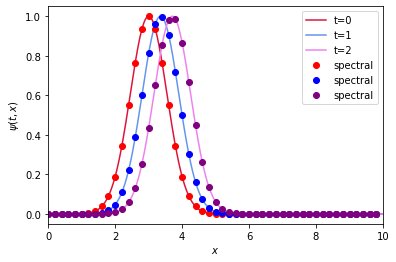

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft
from scipy.integrate import odeint


# Definition of the initial Gaussian profile
def gaussian(x):
    x0 = 3. 
    sigma = np.sqrt(0.3)
    return np.exp(-(x-x0)**2/(2*sigma**2))

def ODE(u, t):
    N = len(u)
    k = np.arange(N)
    k[int(N/2)+1:]-= N
    return -v*ifft(2*np.pi*1j*k/L*fft(u)).real



# spatial grid definition
xi = 0.
xf = 10.
L   = xf - xi
nx  = 50 # number of spatial nodes

# solution domain, initial condition
dx = L/nx     # not L/(nx-1)
x = np.arange(0., L, dx) 

v   = 0.7

psi0 = gaussian(x)



#---------- exact solution with more points for plotting
xx  = np.linspace(0.0, L, 1000)
psi_exact  = gaussian(xx)



#---------- solve the problem and plot
t = np.linspace(0,50,100)
psi = odeint(ODE, psi0, t)




fig,ax=plt.subplots()
ax.plot(xx, psi_exact, '-', color='crimson', label='t=0')
ax.plot(xx + t[1]*v, psi_exact, '-', color='cornflowerblue', label='t=1')
ax.plot(xx + t[2]*v, psi_exact, '-', color='violet', label='t=2')

ax.plot(x, psi[0,:], 'o', color='red', label='spectral')
ax.plot(x, psi[1,:], 'o', color='blue', label='spectral')
ax.plot(x, psi[2,:], 'o', color='purple', label='spectral')
    
plt.xlim([0,10])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(t,x)$')
plt.legend()
plt.show()

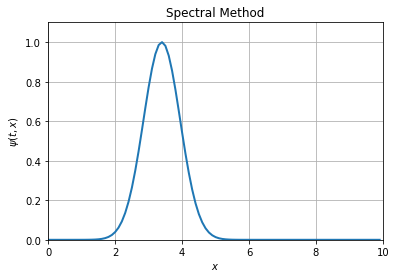

In [4]:
from matplotlib import animation
from IPython.display import HTML

nx  = 100
dx = L/nx     # not L/(nx-1)
x = np.arange(0., L, dx) 
psi0 = gaussian (x)

t = np.linspace(0,30,100)
psi = odeint(ODE, psi0, t)


# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.title('Spectral Method')
ax.set_xlim(( 0, 10))
ax.set_ylim((0, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\psi(t,x)$')
plt.grid()

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    xp = x
    yp = psi[i,:] 
    line.set_data(xp, yp)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50,
                               interval=20, # only 10 frames with a duration of 20 ms each
                               blit=True)

HTML(anim.to_jshtml())
